In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

In [ ]:
# removing the top row 
df = pd.read_csv("/media/vyoom/hdd/database/Algerian_forest_fires.csv", skiprows = 1)

In [2]:
df = pd.read_csv("Algerian_forest_fires.csv", skiprows = 1)

In [ ]:
df.head()

In [3]:
# We also know that there is an isue in row 122 to 123
df.iloc[118:128, :]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire


In [4]:
# we can skip these rows also:
df.drop(df.index[122:124], inplace=True)

In [ ]:
df.iloc[118:128, :]

In [ ]:
df.info()

In [5]:
#We also know that the datframe has half the case for Bej. Reg and other half for Sidi Region
# Case 1 Bejaiya region  = Bej and Case 2 is Sidi Bel Region = Sidi

# adding a new column for region

df['Region'] = 0
df.iloc[122:, :]['Region'] = df.iloc[122:, :]['Region'].replace(0, 1, inplace = True)

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.columns

In [6]:
# We also realize that we have to change the columns from discrete to numeric
df['Temperature'] = df['Temperature'].astype(float)
df[' RH'] = df[' RH'].astype(float)
df[' Ws'] = df[' Ws'].astype(float)
df['Rain '] = df['Rain '].astype(float)
df['FFMC'] = df['FFMC'].astype(float)
df['DMC'] = df['DMC'].astype(float)
df['DC'] = df['DC'].astype(float)
df['BUI'] = df['BUI'].astype(float)
df['ISI'] = df['ISI'].astype(float)
df['BUI'] = df['BUI'].astype(float)
df['FWI'] = df['FWI'].astype(float)

ValueError: could not convert string to float: '14.6 9'

In [7]:
# It seems one of the data in DC column is "14.6 9" which is causing problems lets replace it with 14.69

df['DC'][df['DC'] == "14.6 9"] = 14.69

In [8]:
# We also realize that we have to change the columns from discrete to numeric
df['Temperature'] = df['Temperature'].astype(float)
df[' RH'] = df[' RH'].astype(float)
df[' Ws'] = df[' Ws'].astype(float)
df['Rain '] = df['Rain '].astype(float)
df['FFMC'] = df['FFMC'].astype(float)
df['DMC'] = df['DMC'].astype(float)
df['DC'] = df['DC'].astype(float)
df['BUI'] = df['BUI'].astype(float)
df['ISI'] = df['ISI'].astype(float)
df['BUI'] = df['BUI'].astype(float)
df['FWI'] = df['FWI'].astype(float)

ValueError: could not convert string to float: 'fire   '

In [9]:
# It appears that the FWI has entry from Classes data,Lets find the location

df[df['FWI'] == 'fire   ']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
167,14,07,2012,37.0,37.0,18.0,0.2,88.9,12.9,14.69,12.5,10.4,fire,NaN,1


In [10]:
# lets change the data:
df['Classes  '][df['FWI'] == 'fire   '] = 'fire'
df['FWI'][df['FWI'] == 'fire   '] = None

In [11]:
# We also realize that we have to change the columns from discrete to numeric
df['Temperature'] = df['Temperature'].astype(float)
df[' RH'] = df[' RH'].astype(float)
df[' Ws'] = df[' Ws'].astype(float)
df['Rain '] = df['Rain '].astype(float)
df['FFMC'] = df['FFMC'].astype(float)
df['DMC'] = df['DMC'].astype(float)
df['DC'] = df['DC'].astype(float)
df['BUI'] = df['BUI'].astype(float)
df['ISI'] = df['ISI'].astype(float)
df['BUI'] = df['BUI'].astype(float)
df['FWI'] = df['FWI'].astype(float)

In [ ]:
df.head()

In [ ]:
# we also have to remove the whitespaces in the name columns

df.columns

In [12]:
df.columns = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']

In [ ]:
df.columns

In [ ]:
df.head()

<AxesSubplot:xlabel='Classes', ylabel='count'>

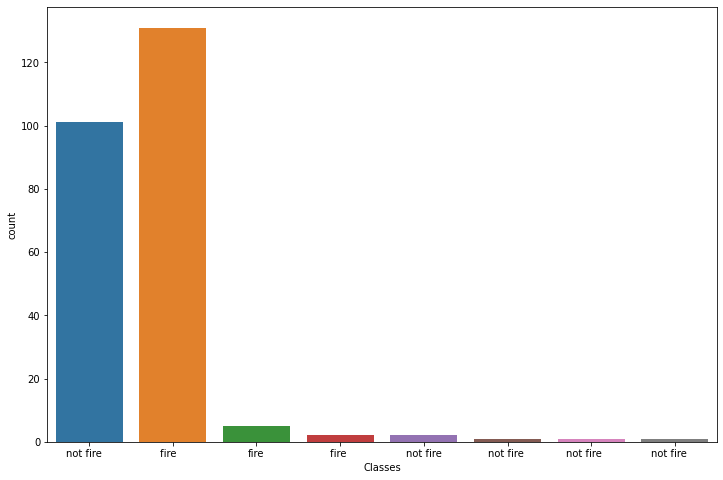

In [13]:
# exploring the object class of "Classes"
plt.figure(figsize = (12,8))
sns.countplot(x = 'Classes', data = df)

In [14]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               5
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [15]:
# it seems we have to remove the whitespaces from the 'Classes' columns
df['Classes'].str.strip()
df['Classes'].value_counts()

fire             131
not fire         101
fire               5
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

##### The str.strip() function is unable to do the job. Lets use something else.

In [16]:
# finding the length of the strings
df['Classes'].str.len().value_counts()

7     131
11    101
4       5
5       2
8       2
9       1
13      1
12      1
Name: Classes, dtype: int64

In [17]:
# as the str.strip() is not working applying a lambda function to strip the string
df['Classes'] = df['Classes'].apply(lambda x: x.strip())
df['Classes'].str.len().value_counts()

4    138
8    106
Name: Classes, dtype: int64

<AxesSubplot:xlabel='Classes', ylabel='count'>

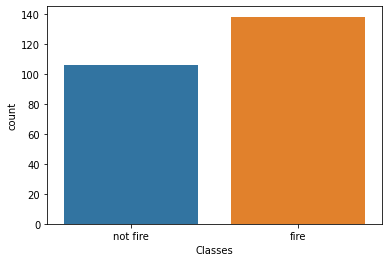

In [18]:
sns.countplot(x = 'Classes', data = df)

#### We also have to do the one hot encoding of the "Classes."

In [19]:
# encoding with fire = 1 and not fire = 0
df["Classes"][df['Classes'] == 'fire'] = 1
df["Classes"][df['Classes']== 'not fire'] = 0
df.head(15)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,02,06,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,03,06,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,04,06,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,05,06,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
5,06,06,2012,31.0,67.0,14.0,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
6,07,06,2012,33.0,54.0,13.0,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
7,08,06,2012,30.0,73.0,15.0,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0
8,09,06,2012,25.0,88.0,13.0,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,0
9,10,06,2012,28.0,79.0,12.0,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,0


<AxesSubplot:xlabel='Classes', ylabel='count'>

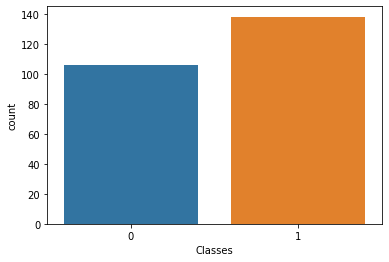

In [20]:
sns.countplot(x = 'Classes', data = df)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    float64
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(10), int64(1), object(4)
memory usage: 38.6+ KB


## Missing Values

<AxesSubplot:xlabel='FWI'>

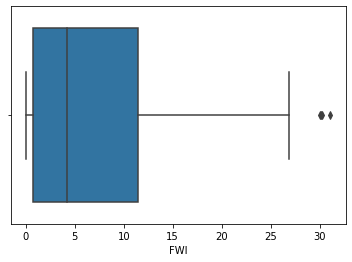

In [22]:
# there is only one missing value in the dataframe

# lets see the distribution of the data
sns.boxplot(x = "FWI", data = df)

In [23]:
# Here we can easily fill the data with the median value
df['FWI'].fillna(value = df['FWI'].median(), inplace = True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    float64
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(10), int64(1), object(4)
memory usage: 38.6+ KB


#### Changing Data types

In [25]:
df['date'] = pd.to_datetime(df.iloc[:, 0:3])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          244 non-null    object        
 1   month        244 non-null    object        
 2   year         244 non-null    object        
 3   Temperature  244 non-null    float64       
 4   RH           244 non-null    float64       
 5   Ws           244 non-null    float64       
 6   Rain         244 non-null    float64       
 7   FFMC         244 non-null    float64       
 8   DMC          244 non-null    float64       
 9   DC           244 non-null    float64       
 10  ISI          244 non-null    float64       
 11  BUI          244 non-null    float64       
 12  FWI          244 non-null    float64       
 13  Classes      244 non-null    object        
 14  Region       244 non-null    int64         
 15  date         244 non-null    datetime64[ns]
dtypes: datet

In [27]:
# Now dropping the the initial column
df.drop(['day', 'month', 'year'], axis = 1, inplace = True)

In [28]:
df.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,2012-06-01
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,2012-06-02
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,2012-06-03
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,2012-06-04
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,2012-06-05
5,31.0,67.0,14.0,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0,2012-06-06
6,33.0,54.0,13.0,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0,2012-06-07
7,30.0,73.0,15.0,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0,2012-06-08
8,25.0,88.0,13.0,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,0,2012-06-09
9,28.0,79.0,12.0,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,0,2012-06-10


In [29]:
df.to_csv("2022_10_22_AlgerianFireCleaned.csv", index = False)

In [ ]:
# saving this cleaned data frame

df.to_csv("/media/vyoom/HDD/database/Algerian_forest_fires_cleaned.csv", index = False)

### EDA

Now the data is cleaned we can go for EDA

In [ ]:
df = pd.read_csv("/media/vyoom/HDD/database/Algerian_forest_fires_cleaned.csv")

In [ ]:
df.head()

### Visualizing the PairPlot:

<Figure size 864x720 with 0 Axes>

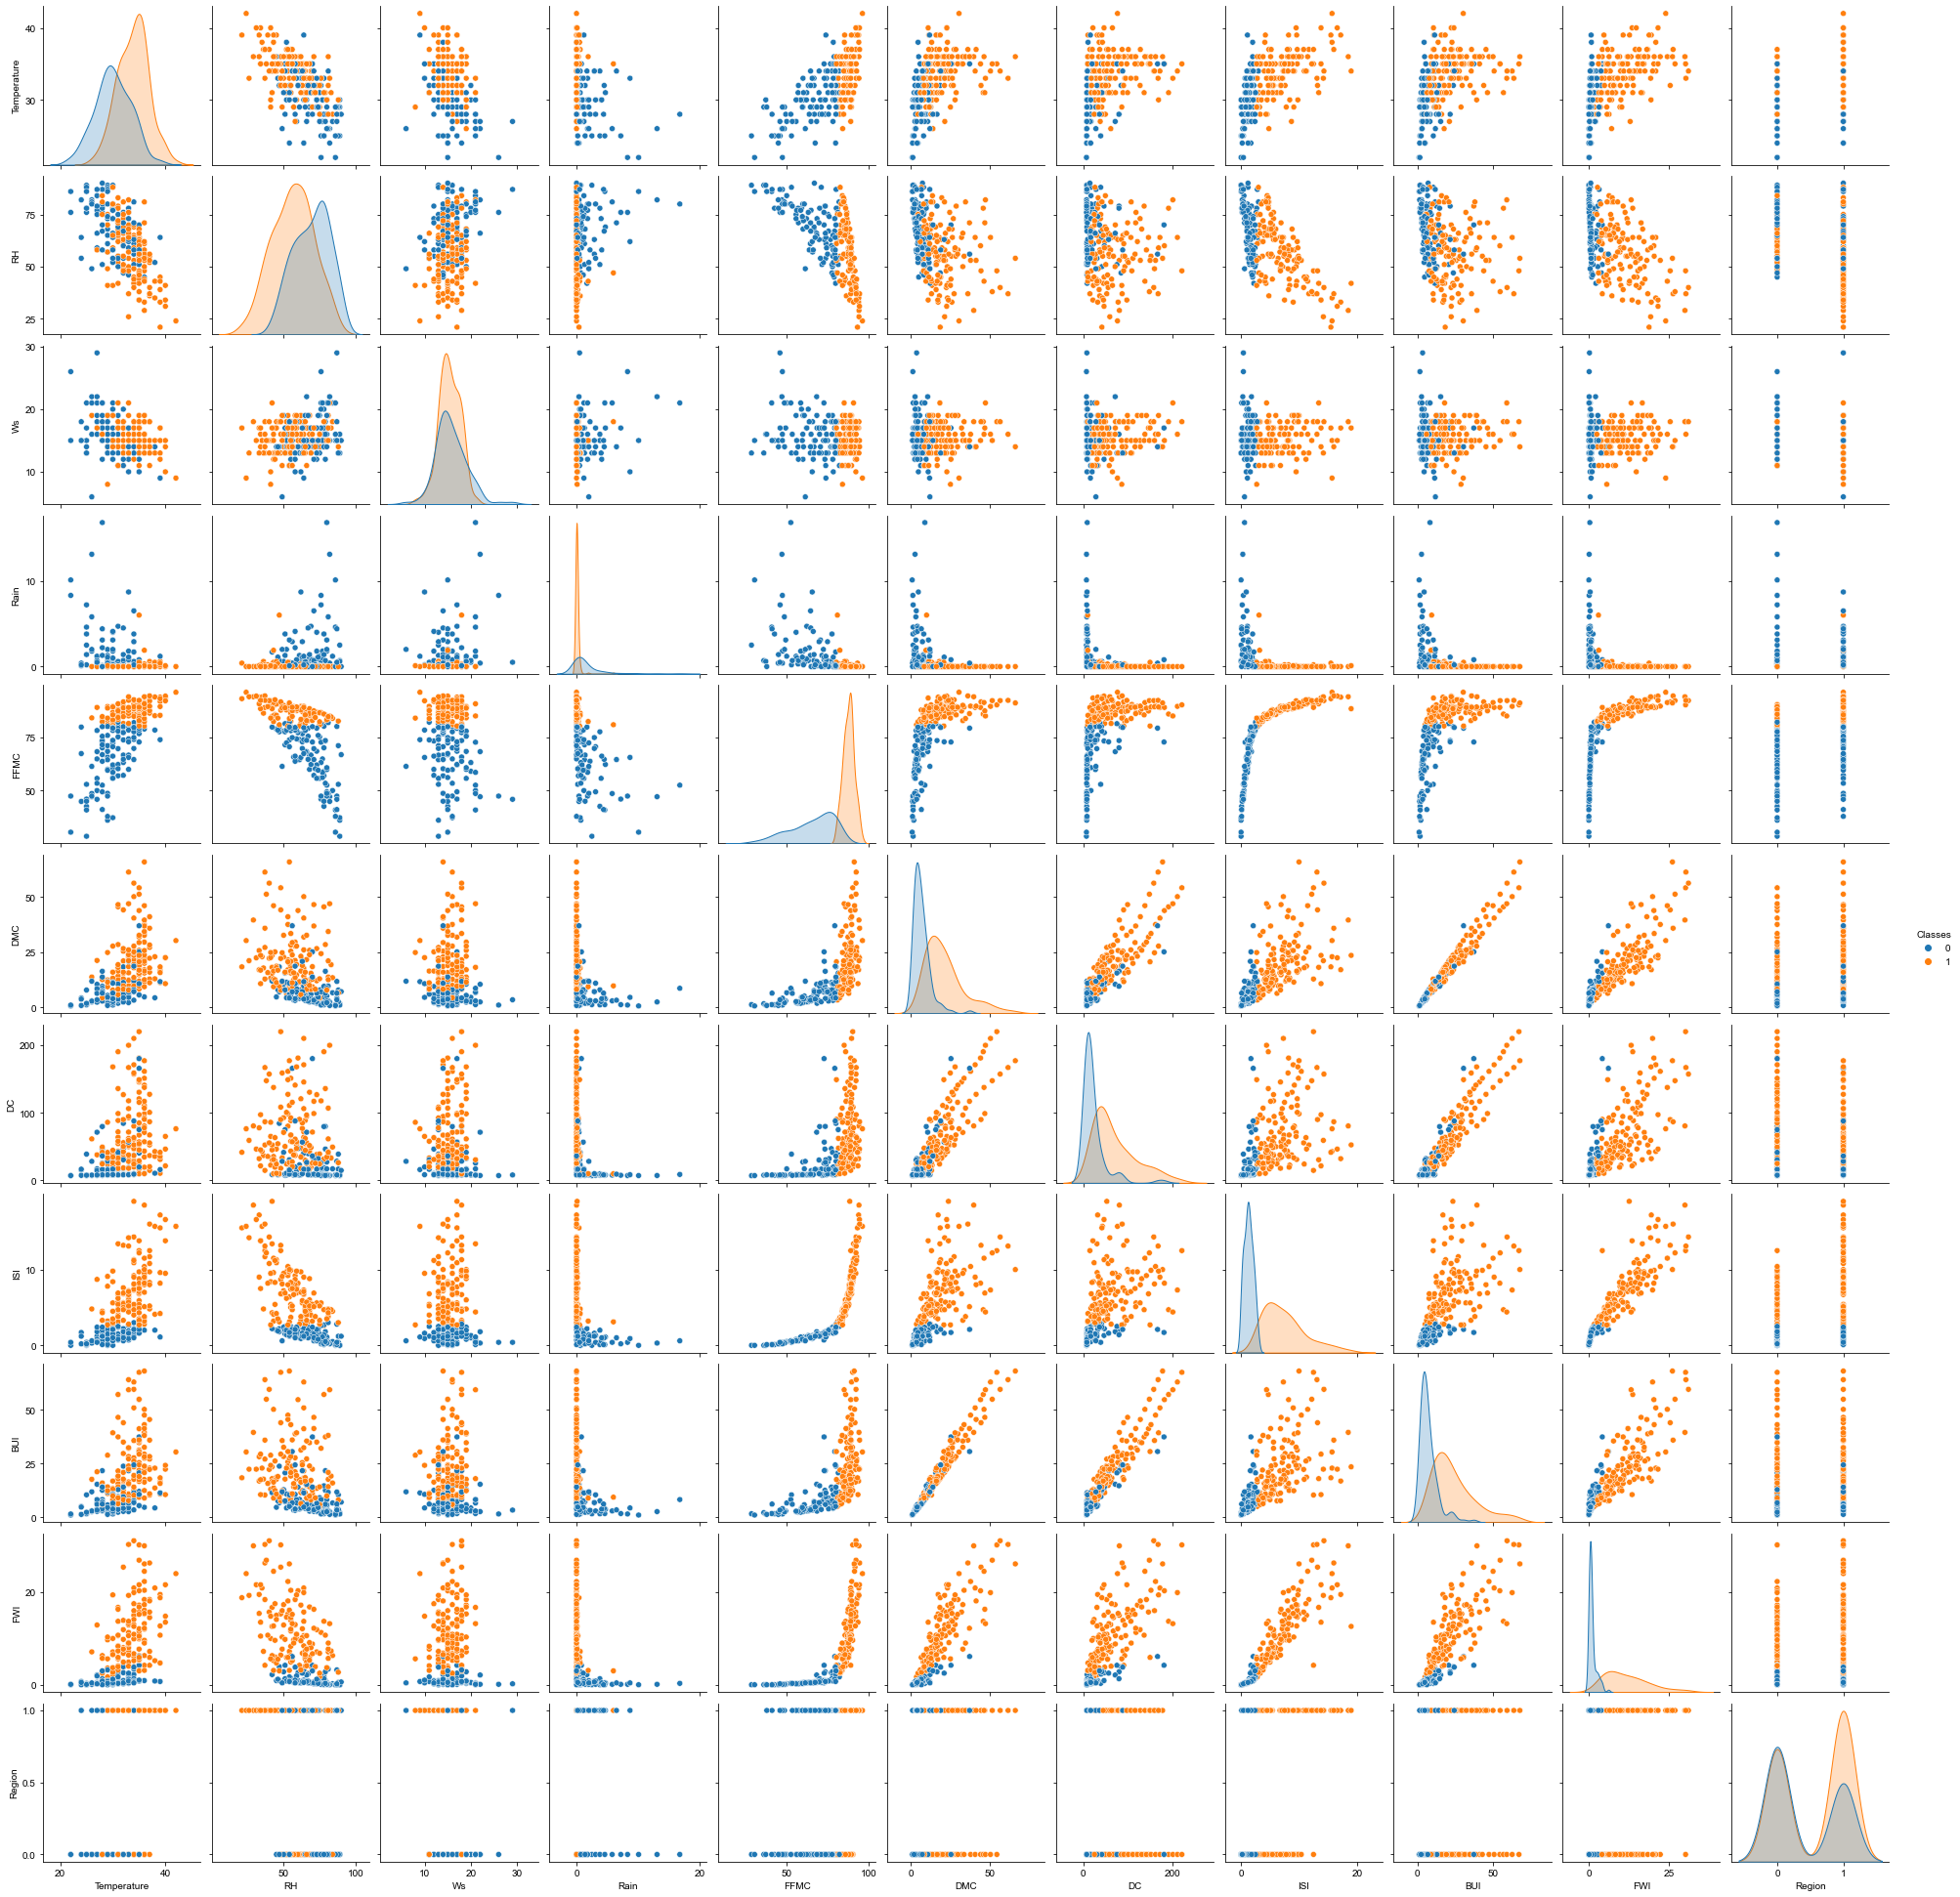

In [30]:
plt.figure(figsize = (12,10))
sns.pairplot(df, hue = 'Classes', palette = "tab10")
sns.set(font_scale=2)

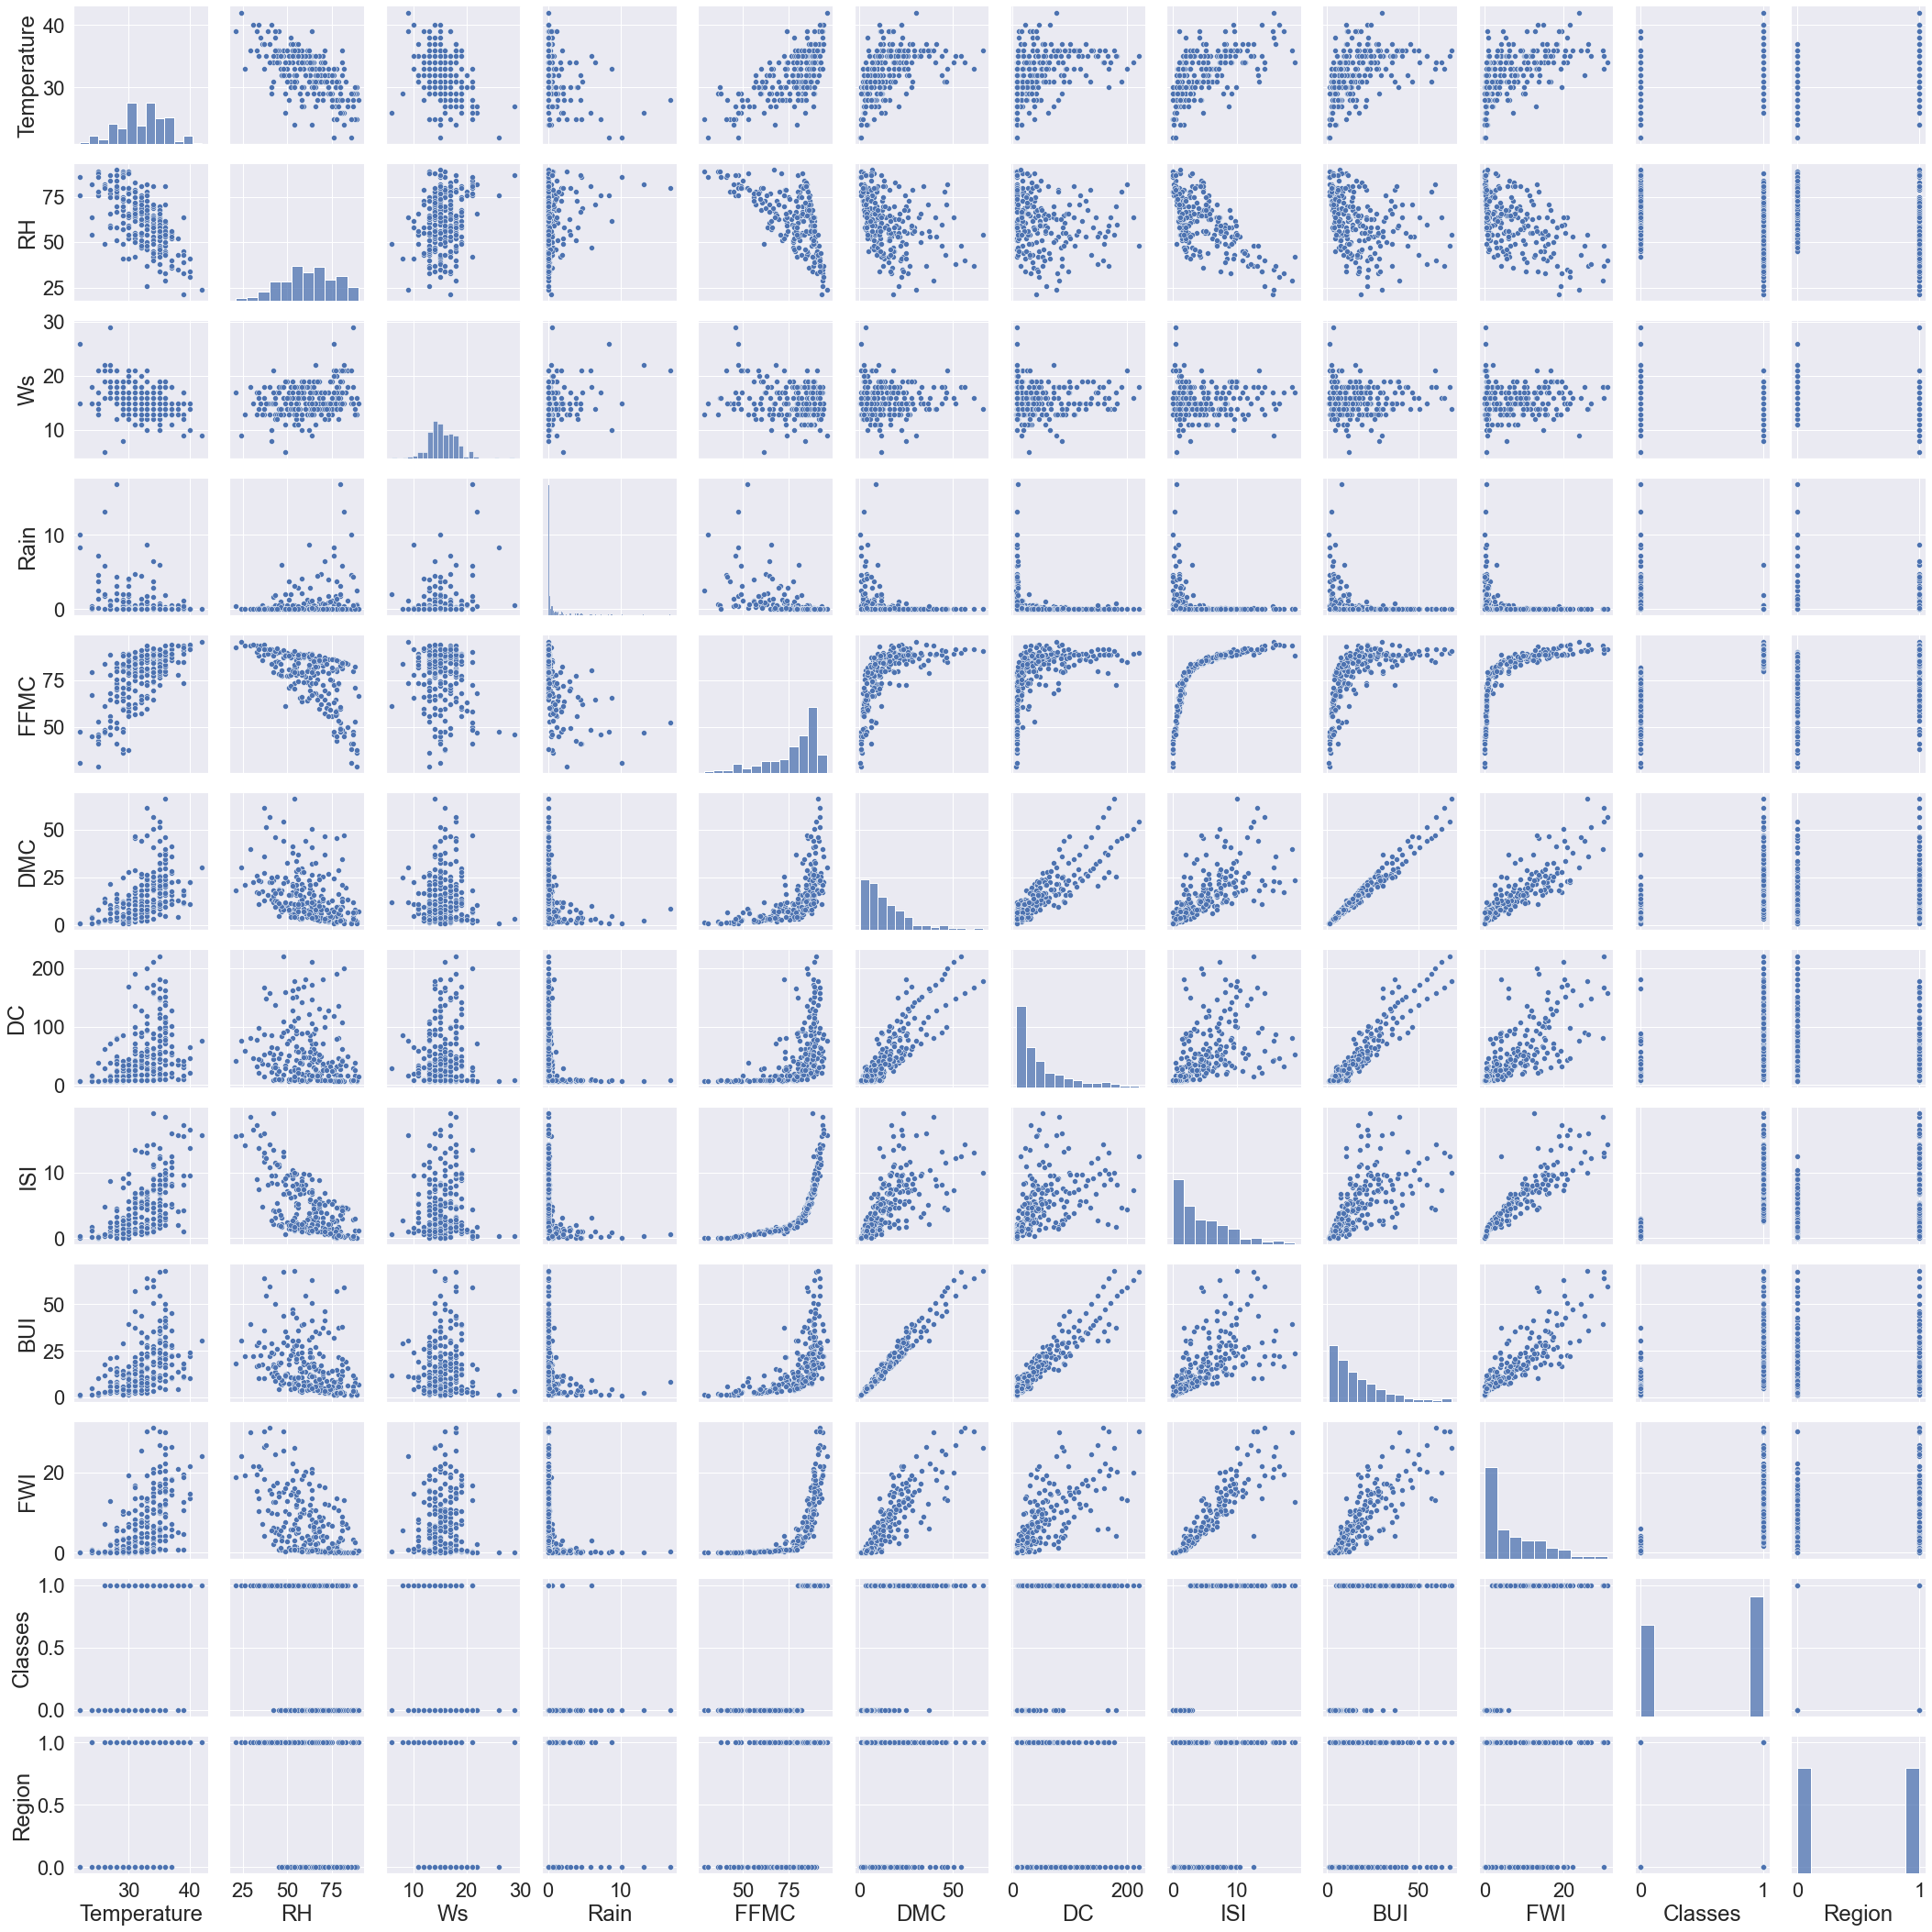

In [31]:
sns.pairplot(df, palette = "tab10")

The following have a strong corelation with the Fire Class:

1. Rain
2. FFMC
3. DMC
4. ISI
5. FWI

###  Corelation plot

<AxesSubplot:>

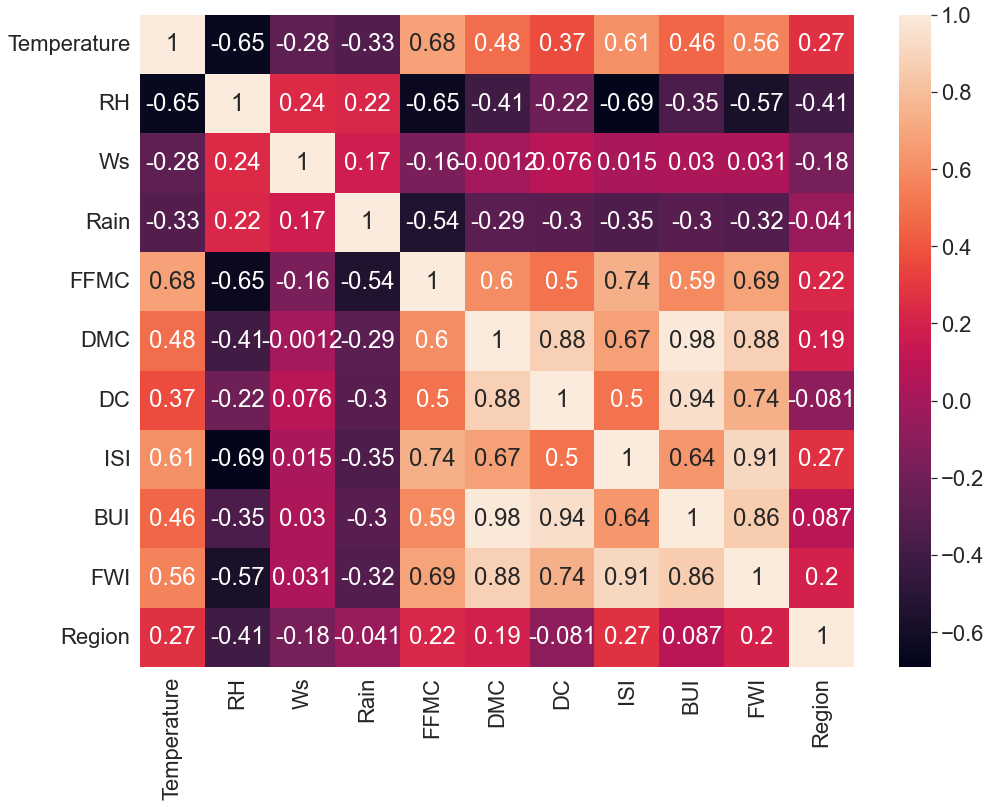

In [32]:
plt.figure(figsize = (16,12))
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:xlabel='BUI', ylabel='DMC'>

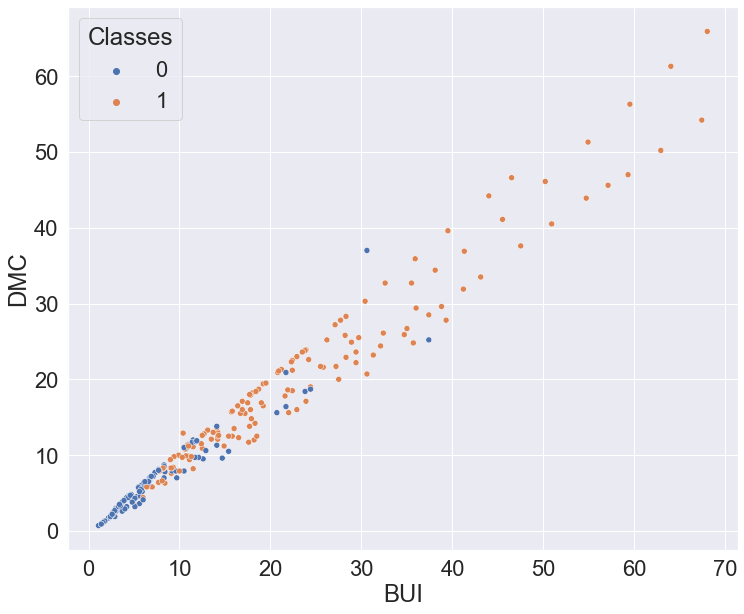

In [33]:
# BUI & DMC ae heavily corelatted
plt.figure(figsize = (12,10))
sns.scatterplot(x = 'BUI', y = 'DMC', data = df, hue = 'Classes')

<AxesSubplot:xlabel='BUI', ylabel='DC'>

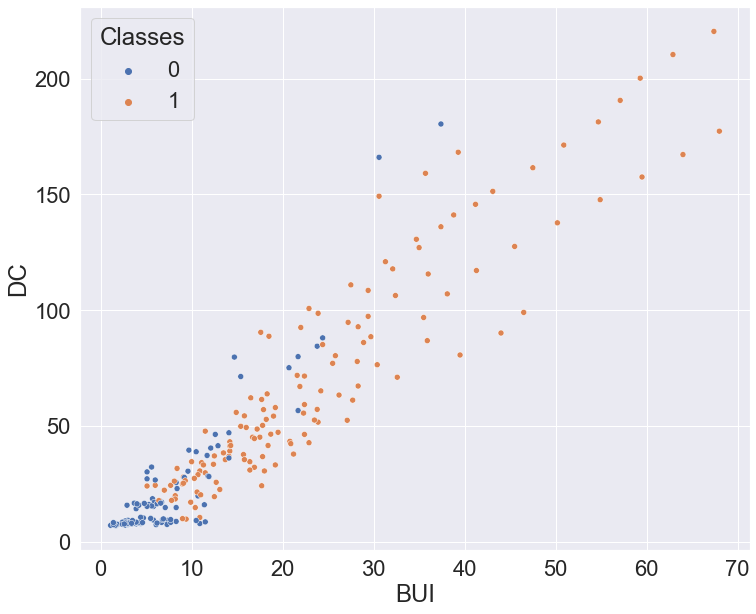

In [34]:
plt.figure(figsize = (12,10))
sns.scatterplot(x = 'BUI', y = 'DC', data = df, hue = 'Classes')

There is a very strong corelation between BUI DMC & DC

<AxesSubplot:xlabel='FWI', ylabel='ISI'>

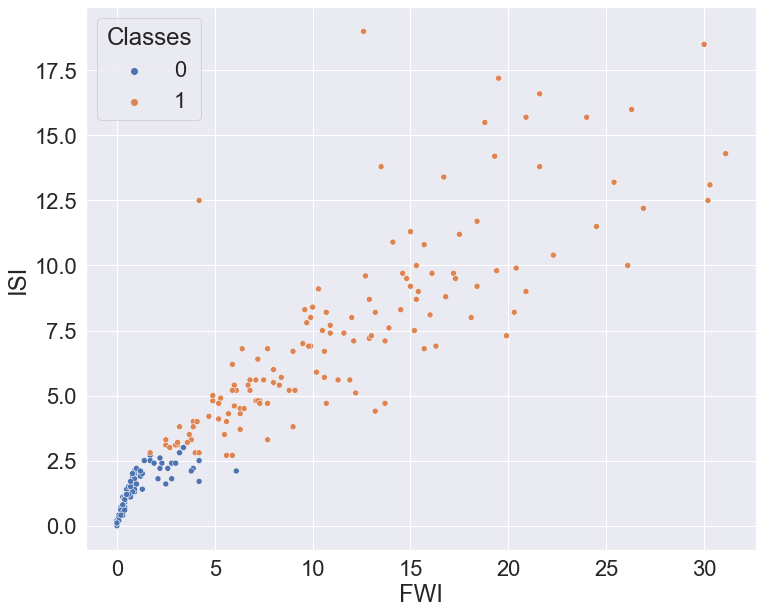

In [35]:
# Between FWI & ISI
plt.figure(figsize = (12,10))
sns.scatterplot(x = 'FWI', y = 'ISI', data = df, hue = 'Classes')

<AxesSubplot:xlabel='BUI', ylabel='ISI'>

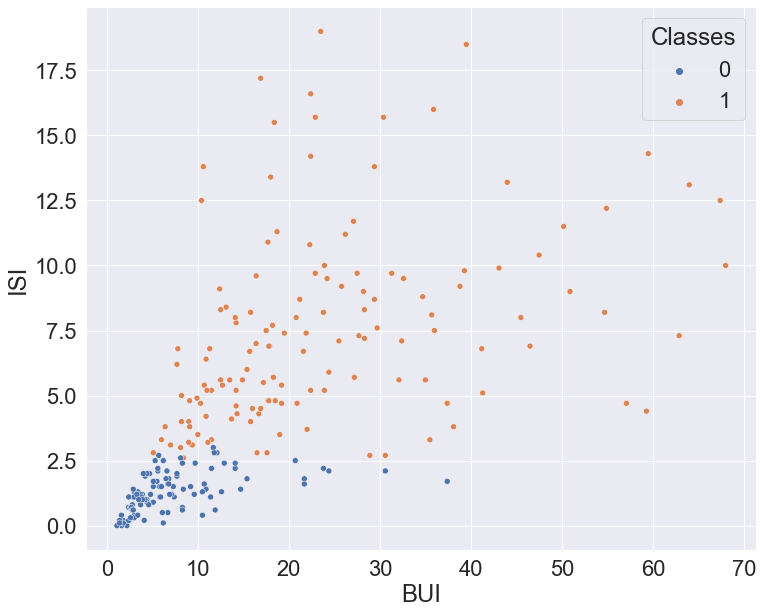

In [36]:
# Between BUI & ISI
plt.figure(figsize = (12,10))
sns.scatterplot(x = 'BUI', y = 'ISI', data = df, hue = 'Classes')

<AxesSubplot:xlabel='BUI', ylabel='FWI'>

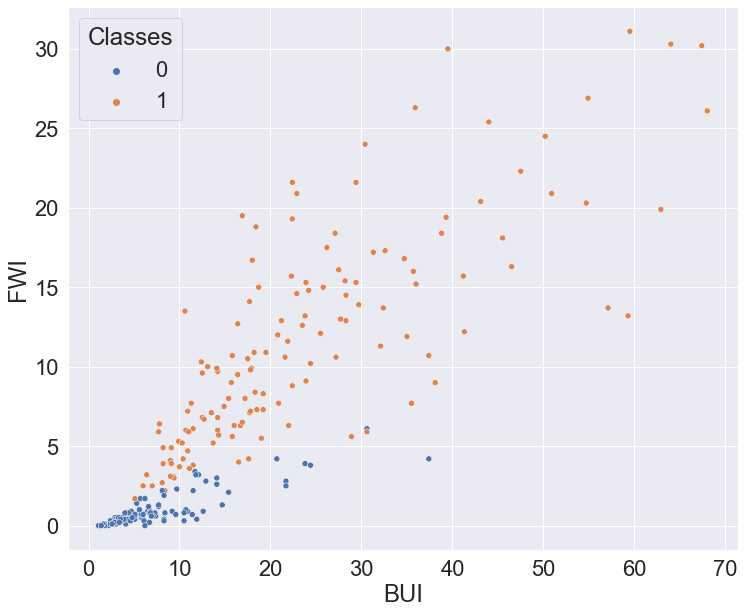

In [37]:
# Between BUI & FWI
plt.figure(figsize = (12,10))
sns.scatterplot(x = 'BUI', y = 'FWI', data = df, hue = 'Classes')

The following are highly coorelated:

- BUI, DMC, DC , FWI
- FWI, ISI

### Dropping the Coorelated columns


##### We will drop:
    - BUI
    - DMC
    - FWI

In [38]:
# Now dropping the the initial column
df.drop(['BUI', 'DMC', 'FWI'], axis = 1, inplace = True)

In [39]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DC,ISI,Classes,Region,date
0,29.0,57.0,18.0,0.0,65.7,7.6,1.3,0,0,2012-06-01
1,29.0,61.0,13.0,1.3,64.4,7.6,1.0,0,0,2012-06-02
2,26.0,82.0,22.0,13.1,47.1,7.1,0.3,0,0,2012-06-03
3,25.0,89.0,13.0,2.5,28.6,6.9,0.0,0,0,2012-06-04
4,27.0,77.0,16.0,0.0,64.8,14.2,1.2,0,0,2012-06-05


## Shuffling the rows:

The rows in the dataframe has an issue. The region has to be shuffled as it is bifurcated between two regions.

In [40]:
df = df.sample(frac = 1)

In [41]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DC,ISI,Classes,Region,date
213,35.0,53.0,17.0,0.5,80.2,149.2,2.7,1,1,2012-08-29
9,28.0,79.0,12.0,0.0,73.2,46.3,1.3,0,0,2012-06-10
108,31.0,52.0,14.0,0.0,87.7,24.3,6.2,1,0,2012-09-17
240,28.0,70.0,15.0,0.0,79.9,36.1,2.4,0,1,2012-09-25
21,31.0,67.0,17.0,0.1,79.1,39.5,2.4,0,0,2012-06-22


## Outliers

<AxesSubplot:xlabel='Temperature'>

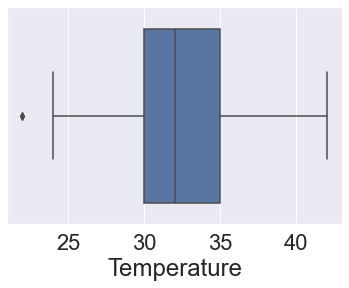

In [42]:
sns.boxplot(x = 'Temperature', data = df)

<AxesSubplot:xlabel='RH'>

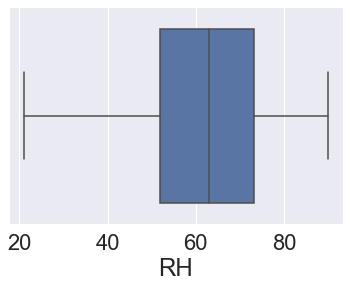

In [43]:
sns.boxplot(x = 'RH', data = df)

<AxesSubplot:xlabel='Ws'>

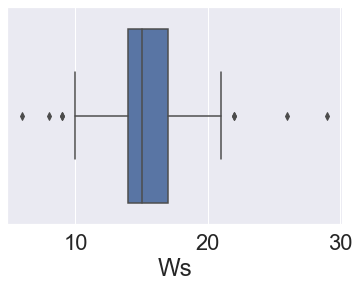

In [44]:
sns.boxplot(x = 'Ws', data = df)

##### The Wind Speed has many outliers.

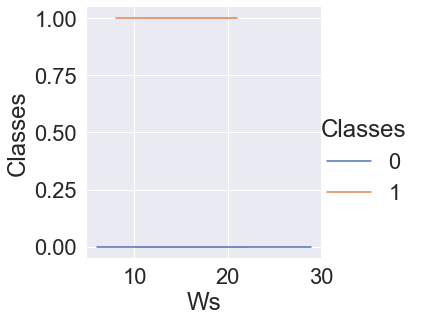

In [51]:
sns.relplot(x = 'Ws', y =  "Classes", kind = "line", hue = "Classes", data = df)

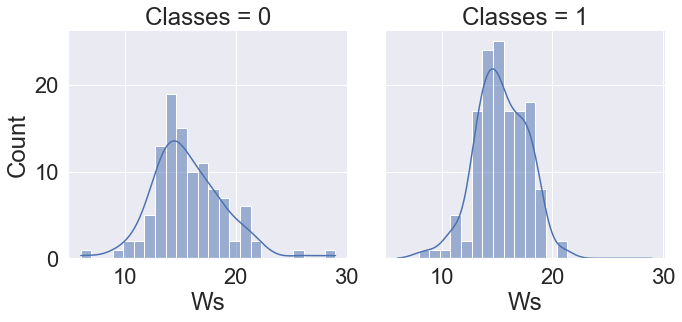

In [52]:
sns.displot(data=df, x="Ws", col="Classes", kde=True)

It seems the outliers are only present in case of "No Fire". This is good. It will clearly provide a better bifurcation of the data.

<AxesSubplot:xlabel='FFMC'>

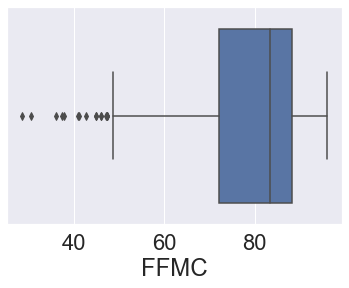

In [53]:
sns.boxplot(x = 'FFMC', data = df)

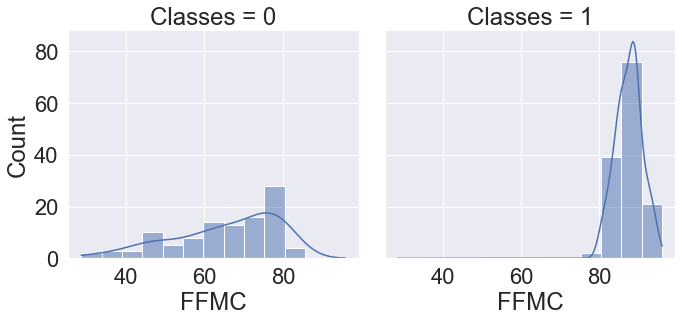

In [54]:
sns.displot(data=df, x="FFMC", col="Classes", kde=True)

In case of FFMC also the outliers have nill effect on classes.

<AxesSubplot:xlabel='DC'>

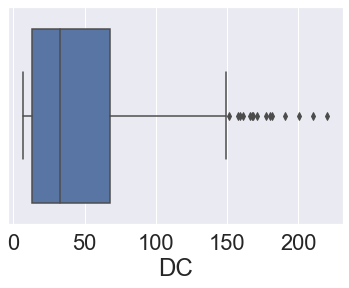

In [55]:
sns.boxplot(x = 'DC', data = df)

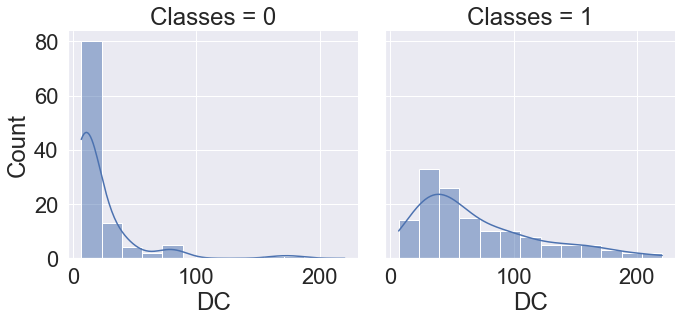

In [56]:
sns.displot(data=df, x="DC", col="Classes", kde=True)

Again it seems the outliers are needed for the class bifurcation.

<AxesSubplot:xlabel='ISI'>

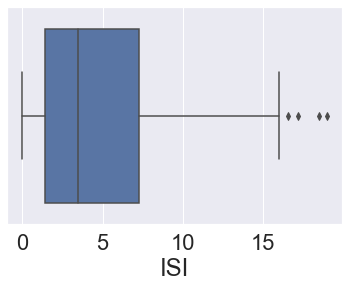

In [57]:
sns.boxplot(x = 'ISI', data = df)

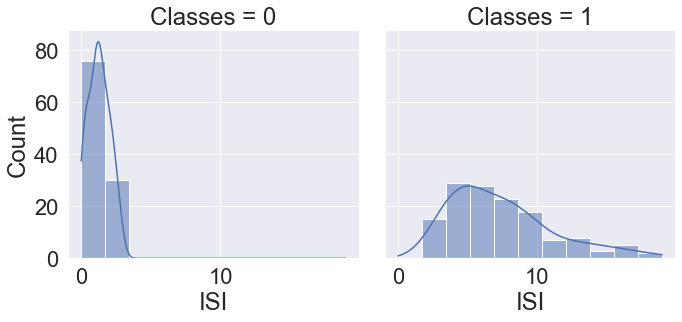

In [58]:
sns.displot(data=df, x="ISI", col="Classes", kde=True)

Here also outliers seem important. 

#### So it seems outliers are important to bifurcate the class difference. So, there is no immediate need to handle the outliers.

##### Train & Test Spilt for the Linear Regression

In [79]:
X = df.drop(['Classes', 'date'], axis = 1)
y = df['Classes'].astype(int)

In [80]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=1)

### Scaling of the data

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

### Training the Model

In [82]:
classifier = linear_model.LogisticRegression(random_state = 2)

In [83]:
classifier

LogisticRegression(random_state=2)

In [84]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=2)

In [85]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=2)

##### Prediction

In [86]:
y_pred = classifier.predict(X_test)

In [88]:
y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1])

### Confusion Matrix

In [89]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", conf_matrix)

Confusion Matrix : 
 [[24  0]
 [ 2 35]]


### Accuracy

In [90]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9672131147540983


This is a pretty good accuracy score and as the confusion matrix score the model is able to predict quite accurately the case of fire and not fire.